In [38]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [39]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, \
    test_size=0.20, 
    stratify=y,
    random_state=1)

In [40]:
#This is the setup; nothing gets executed yet…
pipe_lr = make_pipeline(StandardScaler(), \
    PCA(n_components=2),
    LogisticRegression(random_state=1))
#This will evoke the pipeline
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))


Test Accuracy: 0.967


In [41]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = [] #initialize the object vector
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
    np.bincount(y_train[train]), score))

print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [36 36 36], Acc: 0.917
Fold:  2, Class dist.: [36 36 36], Acc: 0.917
Fold:  3, Class dist.: [36 36 36], Acc: 1.000
Fold:  4, Class dist.: [36 36 36], Acc: 0.917
Fold:  5, Class dist.: [36 36 36], Acc: 1.000
Fold:  6, Class dist.: [36 36 36], Acc: 0.917
Fold:  7, Class dist.: [36 36 36], Acc: 0.917
Fold:  8, Class dist.: [36 36 36], Acc: 1.000
Fold:  9, Class dist.: [36 36 36], Acc: 1.000
Fold: 10, Class dist.: [36 36 36], Acc: 0.917

CV accuracy: 0.950 +/- 0.041


In [42]:
#instead of doing the above, we can use the following:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr,\
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=-1) #use all available cores in the machine

print('CV accuracy scores: %s' % scores)
'''
CV accuracy scores: [ 0.93478261 0.93478261 0.95652174
0.95652174 0.93478261 0.95555556
0.97777778 0.93333333 0.95555556
0.95555556]

'''
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.91666667 0.91666667 1.         0.91666667 1.         0.91666667
 0.91666667 1.         1.         0.91666667]
CV accuracy: 0.950 +/- 0.041


[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


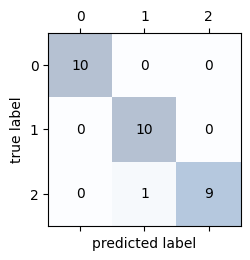

In [43]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), \
    PCA(n_components=2),
    SVC(random_state=1))


pipe_svc.fit(X_train, y_train)
y_predsvc = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_predsvc)
print(confmat)
'''
[[71 1]
[ 2 40]]
'''
fig, ax = plt.subplots(figsize=(2.5, 2.5))
#Matplotlib’s matshow
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
        s=confmat[i, j],
        va='center', ha='center')
        

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [45]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
pipe_lr = make_pipeline(StandardScaler(),PCA(n_components=2),\
                        LogisticRegression(penalty='l2',random_state=1,\
                        C=100.0))

X_train2 = X_train[:, [4, 14]]
cv = list(StratifiedKFold(n_splits=3,\
                          random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

IndexError: index 4 is out of bounds for axis 1 with size 2

In [ ]:
for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1], pos_label=1)
    
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))